In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from datetime import datetime as dt
import numpy as np

plt.style.use('ggplot')
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/churn_dataset.csv")

In [3]:
df.shape

(38822, 71)

In [4]:
df.head().T

,0,1,2,3,4
customer_db_id,54478736d4cde82247f1345f,54478fa4d3cde8d17ca5e4db,5447eefcd3cde8cf7ca5e4eb,5447f1a2d4cde82147f1347d,544976fad4cde8f3415bedb0
customer_id,GB-CUS-Y8922200,GB-CUS-K3854440,GB-CUS-L2277081,GB-CUS-C3589820,GB-CUS-P7798401
gender,male,female,male,male,male
segment,NaN,RED,NaN,NaN,NaN
aov,NaN,10.1501,NaN,NaN,NaN
recency,1370,1211,1370,1370,1190
frequency,0,0,0,0,0
churn_factor,1,1,1,1,1
referred,False,False,False,False,False
newsletter_optin,False,False,False,False,False


# Fill NA values

In [5]:
nans = df.isnull().sum()
nans[nans > 0].sort_values(ascending = False)

refunds_unsuccess              38801
refunds_success                38179
rating_diff                    32774
last_order_rating              32774
first_order_rating             30620
first_order_fac_name           26065
avg_rating                     25465
last_order_voucher_channel     23218
last_order_fac_name            20815
first_order_voucher_channel    20005
first_order_products           10820
last_order_hub_distance         5837
first_order_hub_distance        5779
avg_hub_distance                4720
aov                             4115
segment                         4115
gender                          1140
zip_area                         613
zip                              498
dtype: int64

In [6]:
df['first_order_products'] = df['first_order_products'].fillna("")

In [7]:
df[['refunds_unsuccess', 'refunds_success']] = df[['refunds_unsuccess', 'refunds_success']].fillna(0)

In [8]:
rating_cols = ['avg_rating', 'rating_diff', 'last_order_rating', 'rated_orders', 'first_order_rating']
df[rating_cols] = df[rating_cols].fillna(-999)
df.loc[df.rated_orders > 0, rating_cols].head()

,avg_rating,rating_diff,last_order_rating,rated_orders,first_order_rating
31,5.000000,-999.000000,-999.0,1,-999.0
33,4.821429,-999.000000,-999.0,28,-999.0
38,4.897436,-999.000000,-999.0,39,-999.0
44,3.888889,-999.000000,-999.0,9,-999.0
46,2.333333,2.666667,5.0,3,-999.0


In [9]:
df.aov = df.aov.fillna(0)
df.segment = df.segment.fillna('None')
df.gender = df.gender.fillna('Unknown')

In [10]:
df.zip = df.zip.fillna('Unknown')
df.zip_area = df.zip_area.fillna('Unknown')

df.avg_hub_distance = df.avg_hub_distance.fillna(-999)
df.last_order_hub_distance = df.last_order_hub_distance.fillna(-999)
df.first_order_hub_distance = df.first_order_hub_distance.fillna(-999)

In [11]:
df.first_order_date = pd.to_datetime(df.first_order_date)
df['first_order_week'] = df['first_order_date'].dt.week
df['first_order_year'] = df['first_order_date'].dt.year
df['first_order_yearweek'] = df['first_order_year'].astype(str) + '-' +  df['first_order_week'].astype(str)

In [12]:
df.first_order_fac_name = df.first_order_fac_name.fillna('unknown')
df.first_order_voucher_channel = df.first_order_voucher_channel.fillna('unknown')
df.last_order_fac_name = df.last_order_fac_name.fillna('unknown')
df.last_order_voucher_channel = df.last_order_voucher_channel.fillna('unknown')

In [13]:
nans = df.isnull().sum()
nans[nans > 0].sort_values(ascending = False)

Series([], dtype: int64)

In [14]:
df['churned'] = [True if x > 1 else False for x in df.churn_factor]

# All customers analysis

In [15]:
df.head()

,customer_db_id,customer_id,gender,segment,aov,recency,frequency,churn_factor,referred,newsletter_optin,...,pickup_evening,zip,zip_area,avg_hub_distance,last_order_hub_distance,first_order_hub_distance,first_order_week,first_order_year,first_order_yearweek,churned
0,54478736d4cde82247f1345f,GB-CUS-Y8922200,male,None,0.000000,1370,0.0,1.0,False,False,...,0.0,WC2B 5,wc,4133.502686,4133.502686,4133.502686,43,2014,2014-43,False
1,54478fa4d3cde8d17ca5e4db,GB-CUS-K3854440,female,RED,10.150078,1211,0.0,1.0,False,False,...,0.0,W1D 1BS,w,4169.647505,4209.759086,4129.535924,43,2014,2014-43,False
2,5447eefcd3cde8cf7ca5e4eb,GB-CUS-L2277081,male,None,0.000000,1370,0.0,1.0,False,False,...,1.0,WC2B 5,wc,4133.502686,4133.502686,4133.502686,43,2014,2014-43,False
3,5447f1a2d4cde82147f1347d,GB-CUS-C3589820,male,None,0.000000,1370,0.0,1.0,False,False,...,0.0,WC2A 3,wc,4093.847747,4093.847747,4093.847747,43,2014,2014-43,False
4,544976fad4cde8f3415bedb0,GB-CUS-P7798401,male,None,0.000000,1190,0.0,1.0,False,False,...,0.0,WC2B 5,wc,4129.535924,4129.535924,4129.535924,7,2015,2015-7,False


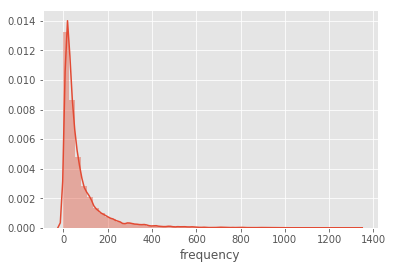

In [16]:
sns.distplot(df.loc[df.valid_orders > 1].frequency)

In [17]:
zips = df.groupby(['zip'])['customer_db_id'].nunique().sort_values(ascending=False)
zips = zips.loc[zips > 20].reset_index().zip.unique()

df_seg = df.loc[df.zip.isin(zips)].groupby(['segment', 'zip_area', 'zip'])\
                    ['customer_db_id'].nunique()\
                    .reset_index()\
                    .rename(columns={'customer_db_id': 'customers'})
df_seg = df_seg.merge(df_seg.groupby(['segment'])\
                      ['customers'].sum()\
                      .reset_index()\
                      .rename(columns={'customers': 'segment_total'}), on='segment')
df_seg['customers_segment'] = df_seg.customers / df_seg.segment_total

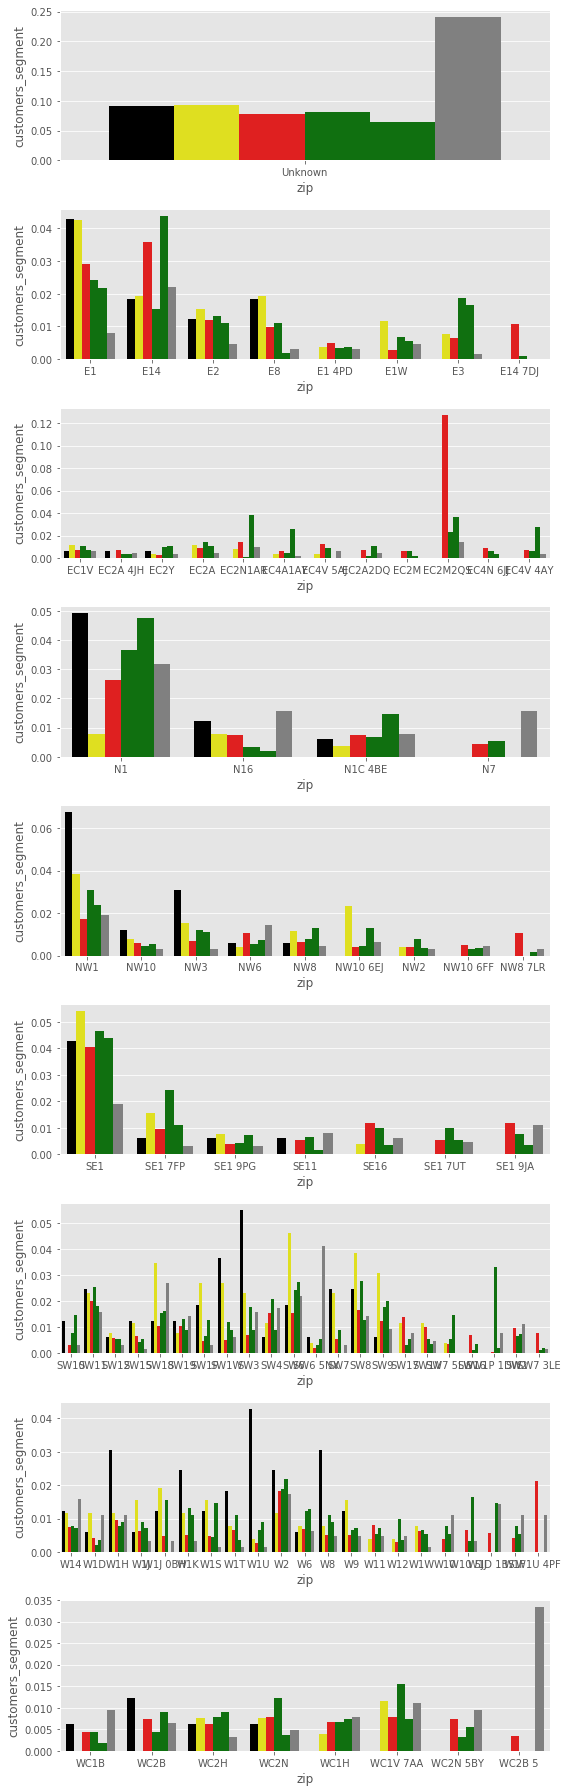

In [18]:
flatui = ["BLACK", "YELLOW", "RED", "GREEN", "GREEN", "GRAY"]
sns.set_palette(flatui)

# zip_areas = df_seg.zip_area.unique().tolist()
# fig, axarray = plt.subplots(nrows=len(zip_areas), figsize=(10,10))

# for idx, zip_area in enumerate(zip_areas):
    
#     ax = axarray[idx]
#     sns.barplot(data=df_seg.loc[df_seg.zip_area == zip_area], x='zip', y='customers_segment', hue='segment', 
#                 hue_order=['BLACK', 'GOLD', 'RED', 'GREEN.PROFIT', 'GREEN.DENSITY', 'None'], ax=ax)
#     ax.legend_.remove()
# plt.tight_layout()

zip_areas = df_seg.zip_area.unique().tolist()
fig=plt.figure(figsize=(8, 25))

for idx, zip_area in enumerate(zip_areas):
    ax = fig.add_subplot(len(zip_areas), 1, idx+1)
    sns.barplot(data=df_seg.loc[df_seg.zip_area == zip_area], x='zip', y='customers_segment', hue='segment', 
                hue_order=['BLACK', 'GOLD', 'RED', 'GREEN.PROFIT', 'GREEN.DENSITY', 'None'])
    ax.legend_.remove()
plt.tight_layout()

# Bad vs Good Voucher Customers
*Assumption: Bad customers are customers who had one completed order using a voucher, had a good customer experience and didn't place another order for more than a year. These customers should be excluded from churn analysis.*

We want to analyse, if there are any specific features, such as area, channels, products that identify bad customers. In order to analyse, we create a 'Good Customers' group, which are customers, who have returned after their first order with vouchers.

Bad Voucher customers: 
- First_Order_Voucher == TRUE
- Completed_Orders == 1
- Total_Orders == 1
- Last_Order > 365 days ago

Good Voucher customers:
- First_Order_Voucher == TRUE
- Completed_Orders > 1

In [19]:
df_vou = df.loc[df.first_order_voucher & df.valid_orders > 0]
df_vou_good = df_vou.loc[(df_vou.valid_orders > 1)]
df_vou_bad = df_vou.loc[(df_vou.valid_orders == 1) & (df_vou.total_orders == 1) & (df_vou.recency > 365)]

In [20]:
print('Number of Bad customers: ', df_vou_bad.shape[0])
print('Number of Good customers: ', df_vou_good.shape[0])

df_vou_bad['customer_type'] = 'bad'
df_vou_good['customer_type'] = 'good'

Number of Bad customers:  6875
Number of Good customers:  2605


In [21]:
def plot_bad_vs_good_by_column(column_name):
    df_bad = df_vou_bad.groupby(column_name)['customer_db_id'].nunique() / df_vou_bad.shape[0]
    df_good = df_vou_good.groupby(column_name)['customer_db_id'].nunique() / df_vou_good.shape[0]
    df_diff = df_good - df_bad
    df_diff_relative = df_diff / (df_bad + df_good)
    df = pd.concat([df_bad, df_good, df_diff, df_diff_relative], 
                  axis=1, keys=['bad', 'good', 'diff', 'diff_relative'], sort=True)
    
    df = df.sort_values('diff', ascending=False)
    df[['bad', 'good']].plot(kind='bar', title=column_name)
    df[['diff']].plot(kind='bar', title='diff (+ more good / - more bad)', color='orange')
#     df[['diff_relative']].sort_values('diff_relative', ascending=False).plot(kind='bar', title='diff relative (diff / all customers)', color='orange')

# Bad customers with Bad experience
*Assumption: If a BAD customer churned because of bad experience, he should be included in the churn analysis*

Customers falling into the following groups should not be excluded from analysis:
* reclean_order
* order_rating < 4
* internal_reschedules > 1
* refund

In [22]:
df_vou_bad.groupby(['reclean_orders'])['customer_db_id'].nunique()

reclean_orders
0    6863
1      12
Name: customer_db_id, dtype: int64

In [23]:
df_vou_bad.groupby(['last_order_rating'])['customer_db_id'].nunique()

last_order_rating
-999.0    5706
 1.0       101
 2.0        37
 3.0       106
 4.0       247
 5.0       678
Name: customer_db_id, dtype: int64

In [24]:
df_vou_bad.groupby(['internal_reschedules'])['customer_db_id'].nunique()

internal_reschedules
0    6548
1     249
2      56
3      18
4       3
5       1
Name: customer_db_id, dtype: int64

In [25]:
df_vou_bad.groupby(['refunds_success'])['customer_db_id'].nunique()

refunds_success
0.0    6867
1.0       8
Name: customer_db_id, dtype: int64

In [26]:
df_vou_bad_exp = df_vou_bad.loc[
    (df_vou_bad.reclean_orders == 1) |
    (df_vou_bad.last_order_rating < 4) |
    (df_vou_bad.refunds_success == 1) |
    (df_vou_bad.internal_reschedules > 1)
]

df_vou_bad = df_vou_bad.loc[~df_vou_bad.customer_db_id.isin(df_vou_bad_exp.customer_db_id)]
df_both = pd.concat([df_vou_bad, df_vou_good])

print('Bad with bad experience: ', df_vou_bad_exp.shape[0])
print('Bad with good experience: ', df_vou_bad.shape[0])

Bad with bad experience:  5960
Bad with good experience:  915


# Bad Customers with Good Experience

## Voucher Channel
*Assumption: The channel through which the customer has received the voucher influences if the acquired customer is going to come back after the first order.*

In [ ]:
plot_bad_vs_good_by_column('first_order_voucher_channel')

Conclusion: Customers that have acquired their vouchers from the following channels are **likely to churn after first order, even if they had a good customer experience**, and should be excluded from the analysis.
* SEO
* SEM
* Appco/Direct Sales



In [ ]:
bad_voucher_channels = ['SEO', 'SEM', 'Appco/Direct Sales']

## Distance to Hub
*Assumption: The distance of the customer to the hub influences the availability he/she sees when they place an order. If there is bad availability, the customer might not come back.*

In [ ]:
a = df_both.loc[df_both.first_order_hub_distance != -999, ['customer_type', 'first_order_hub_distance']]
sns.categorical.stripplot(data=a, x='customer_type', y='first_order_hub_distance')

In [ ]:
f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True,figsize=(6,6))
sns.distplot(a.loc[a.customer_type == 'bad', 'first_order_hub_distance'], ax=ax1, color='red', bins=25)
ax1.set_title('Bad Customers')
sns.distplot(a.loc[a.customer_type == 'good', 'first_order_hub_distance'], ax=ax2, color='blue', bins=25)
ax2.set_title('Good Customers')
plt.tight_layout()

*Conclusion*: It doesn't seem that distance to hub plays a role in the first_voucher_order churn.

## Dates
*Assumption: The dates when more bad customers came than good, could mean that there was a certain period of campaigns that attracted undesirable customers.*

In [ ]:
bad_limit = df_vou_bad.loc[df_vou_bad.first_order_date < "2017-07-21"]
good_limit = df_vou_good.loc[df_vou_good.first_order_date < "2017-07-21"]
bad = bad_limit\
        .groupby('first_order_date')['customer_db_id']\
        .nunique() / bad_limit.shape[0]
good = good_limit\
        .groupby('first_order_date')['customer_db_id']\
        .nunique() / good_limit.shape[0]

df_plot = pd.concat([bad, good], axis=1, keys=['bad', 'good']).reset_index()
df_plot = df_plot.groupby([pd.Grouper(key='first_order_date', freq='MS')])[['bad', 'good']]\
        .sum()\
        .reset_index()\
        .sort_values('first_order_date')\
        .set_index('first_order_date')

In [ ]:
df_plot.plot()

*Conclusion*: Seems that there were some areas, especially around Feb - April 2016, where loads of "bad customers" were coming in. We should look at what kind of campaigns there were running at that time.

## Facility
*Assumption: Some facilities provide better services and therefore customers who churned after first order, although having a 'good' facility, are concidered bad.*

In [ ]:
plot_bad_vs_good_by_column('first_order_fac_name')

## Product Segmentation
*Assumption: Bad customers order certain type of products*

TODO: too many UNKNOWN values for bad customers, need to include itemization

In [ ]:
plot_bad_vs_good_by_column('first_order_products')

## Service Class

In [ ]:
plot_bad_vs_good_by_column('first_order_service_class')

## Gender

In [ ]:
plot_bad_vs_good_by_column('gender')

## Zip Area

In [ ]:
plot_bad_vs_good_by_column('zip_area')

In [ ]:
df_both.columns

In [ ]:
features = ['first_order_products', 'first_order_voucher_channel', 'first_order_fac_name', 'avg_hub_distance']
df_good = df_vou_good.sample(df_vou_bad.shape[0])
df_bad = df_vou_bad.copy()
df_both = pd.concat([df_good, df_bad])

In [ ]:
df_both = df_both[['customer_type'] + features]
df_both.columns

In [ ]:
voucher_channel_le = LabelEncoder()
voucher_channel_le.fit(df_both.first_order_voucher_channel)
df_both['first_order_voucher_channel_enc'] = voucher_channel_le.transform(df_both.first_order_voucher_channel.tolist())

In [ ]:
products_le = LabelEncoder()
products_le.fit(df_both.first_order_products)
df_both['first_order_products_enc'] = products_le.transform(df_both.first_order_products.tolist())

In [ ]:
facility_le = LabelEncoder()
facility_le.fit(df_both.first_order_fac_name)
df_both['first_order_fac_name_enc'] = facility_le.transform(df_both.first_order_fac_name.tolist())

In [ ]:
df_both['customer_type'] = df_both['customer_type'].map({'bad': -1, 'good': 1})

In [ ]:
df_both = df_both[['first_order_products_enc', 'first_order_voucher_channel_enc', 
         'first_order_fac_name_enc', 'avg_hub_distance', 'customer_type']]

In [ ]:
df_both.corr()

In [ ]:
sns.heatmap(df_both.corr(), 
            xticklabels=df_both.corr().columns.values,
            yticklabels=df_both.corr().columns.values)

In [ ]:
X = df_both[['first_order_products_enc', 'first_order_voucher_channel_enc', 
         'first_order_fac_name_enc', 'avg_hub_distance']].values
y = df_both[['customer_type']].values

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
neigh = DecisionTreeClassifier()
neigh.fit(X, y)

In [ ]:
neigh.decision_path(X)

In [ ]:
tree.export_graphviz(neigh, out_file='tree.dot')